In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [3]:
img = image.load_img("/content/drive/MyDrive/Mood Classifiation/Photos/IMG20201217174240.jpg")

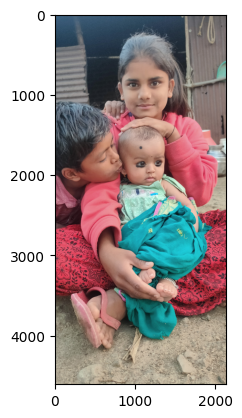

In [4]:
plt.imshow(img)

In [5]:
# To print image as array
i1 = cv2.imread("/content/drive/MyDrive/Mood Classifiation/Photos/IMG20201217174240.jpg")
print(i1)

[[[119  92  55]
  [146 119  82]
  [128 101  64]
  ...
  [ 96  93  95]
  [ 98  96  96]
  [ 91  89  89]]

 [[124  97  60]
  [145 118  81]
  [133 106  69]
  ...
  [103 100 102]
  [ 96  94  94]
  [ 87  85  85]]

 [[123  96  59]
  [124  97  60]
  [122  95  58]
  ...
  [ 96  93  95]
  [101  99  99]
  [ 93  91  91]]

 ...

 [[170 190 195]
  [148 168 173]
  [152 172 177]
  ...
  [158 177 184]
  [155 174 181]
  [158 177 184]]

 [[166 185 190]
  [144 163 168]
  [136 156 161]
  ...
  [154 173 180]
  [155 175 180]
  [157 177 182]]

 [[136 155 160]
  [148 167 172]
  [155 175 180]
  ...
  [155 174 181]
  [158 178 183]
  [157 177 182]]]


In [6]:
i1.shape

(4608, 2128, 3)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
# to scale the image i need to divide with 255
# we need to relize the image useing 200,200 pixel

In [9]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Mood Classifiation/Training",
                                         target_size=(200,200),batch_size=3,class_mode="binary")
validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/Mood Classifiation/validation",
                                                   target_size=(200,200),batch_size=3,class_mode="binary")


Found 12 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [10]:
train_dataset.class_indices

{'Happy': 0, 'Not Happy': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(255,activation="relu"),
                                   ##
                                   tf.keras.layers.Dense(1,activation="sigmoid")
                                   ]
                                   )

In [13]:
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [14]:
model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 18s 1s/step - loss: 1.6256 - accuracy: 0.4444
Epoch 2/10
3/3 [==============================] - 1s 336ms/step - loss: 0.7028 - accuracy: 0.4444
Epoch 3/10
3/3 [==============================] - 1s 418ms/step - loss: 0.6722 - accuracy: 0.5556
Epoch 4/10
3/3 [==============================] - 1s 425ms/step - loss: 0.6290 - accuracy: 0.5556
Epoch 5/10
3/3 [==============================] - 2s 915ms/step - loss: 0.4184 - accuracy: 0.7778
Epoch 6/10
3/3 [==============================] - 2s 450ms/step - loss: 0.8937 - accuracy: 0.7778
Epoch 7/10
3/3 [==============================] - 1s 416ms/step - loss: 0.2767 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 2s 471ms/step - loss: 0.5540 - accuracy: 0.8889
Epoch 9/10
3/3 [==============================] - 1s 355ms/step - loss: 0.1540 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 1s 436ms/step - loss: 0.2288 - accuracy: 0.8889


In [15]:
dir_path = "/content/drive/MyDrive/Mood Classifiation/Testing"
for i in os.listdir(dir_path):
  print(i)

IMG_20210116_180629.jpg
IMG20201217174233.jpg
IMG_20210517_171358.jpg
IMG_20210116_161421.jpg
IMG_20201202_184045.jpg
IMG20201217174240.jpg
IMG20201217184012.jpg
IMG20210103165359.jpg
IMG20201217181511.jpg
IMG20201217181521.jpg
IMG20201217181515.jpg
IMG20210109161955.jpg


In [16]:
dir_path = "/content/drive/MyDrive/Mood Classifiation/Testing"
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+"//"+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
dir_path = "/content/drive/MyDrive/Mood Classifiation/Testing"
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+"//"+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis=0)
  images = np.vstack([X])

  val = model.predict(images)

  if val == 0:
    print("I am happy.")
  else:
    print("I am not happy.")

Output hidden; open in https://colab.research.google.com to view.